<a href="https://colab.research.google.com/github/ManantenaKiady/Pytorch-fundamentals/blob/master/Notebooks/pytorch_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Turn !!

## Objective: 

- Train a deep learning model to classify images from CIFAR10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html

## Setup

In [3]:
!pip3 install torch torchvision torchaudio

# Check the installed version 
import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.13.0+cu116'

Configure

In [4]:
# Check if GPU are available and set the device to use it
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [50]:
# Create models folder
!mkdir models

## Load the dataset

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets 

from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [12]:
# To retrieve the dataset
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

We can pass the Dataset as an argument to DataLoader in order to:

- Make the Dataset iterable
- To supports automatic batching and sampling
* To make it shuffleable
- To support multiprocess data loading

In [14]:
import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 5

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)


**Show some images from the dataset**

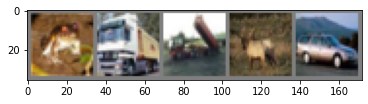

frog  truck truck deer  car  


In [16]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)))

## Build a CNN (Convolutional Neural Network ) model

- use Conv2d layer from nn module

<font color='green'> Q1: Import all required module and functions </font>

In [18]:
# ------ you code here --------

<font color='green'> Q2: Uncomment and complete the following code </font>

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # in_channels, out_channels, kernel_size
        # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv_stack = nn.Sequential(
             nn.Conv2d(3, 6, 5),
             nn.ReLU(),
             nn.MaxPool2d(2, 2),
             nn.Conv2d(6,16,5),
             nn.ReLU(),
             nn.MaxPool2d(2, 2)
        )

        self.flatten = nn.Flatten(1)
        # -------------- Add three Linear Layers ----------------
        # ------------ first: in: 16*5*5, out = 120 -------------
        # ------------ Add ReLU function ------------------------
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU()
        )
        # ------------ second: in: 120, out = 84 ----------------
        # ------------ Add ReLU function ------------------------
        # ----------- Uncomment and complete the code -----------
        # self.fc2 = ...
        # ------------ third: in: 84, out = 10 ------------------
        # --------------- Your code here ------------------------
        # # self.fc3 = ...
    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        # ----------- Pass x through the last layer -------------
        # ------------ YOUR CODE HERE ---------------------------
        return x

<font color='green'> Q3: Initialize a network (model) </font>

In [44]:
# ----------- your code here --------------

<font color='green'> Q4: Define a Loss Function and optimizer </font>

- In multiclass classification we use the `CrossEntropyLoss`

- Use the `sgd` optimizer with learning rate = 0.001

In [45]:
# ------------ your code here --------------





### Train the network

In [46]:

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  running_loss = 0.0
  for batch, (X,y) in enumerate(dataloader):
    # Set the data to load into the device
    X,y = X.to(device), y.to(device)

    # Set the gradients to all Tensor to zero
    optimizer.zero_grad()

    # Compute the prediction error
    # -------------- UNCOMMENT AND COMPLETE -------------------
    # pred = ....
    # loss = loss_fn(..., ...)

    # Backpropagation
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  
    if batch % 2000 == 1999:
      print(f'batch: {batch}, loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  model.eval()
  test_loss, correct = 0, 0
  # Disable gradient calculation
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches 
  correct /= size 

  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [47]:
# -------------------UNCOMMENT AND RUN -------------------
# epochs = 2
# for t in range(epochs):
#   print(f"Epoch {t+1}\n ------------------------")
#   train(train_dataloader, net, loss_fn, optimizer)
#   test(test_dataloader, net, loss_fn)

# print("Done!")

Epoch 1
 ------------------------
[2, 10000] loss: 2.233
[2, 10000] loss: 1.819
[2, 10000] loss: 1.612
[2, 10000] loss: 1.551
[2, 10000] loss: 1.472
Test Error: 
 Accuracy: 47.9%, Avg loss: 1.440456 

Epoch 2
 ------------------------
[2, 10000] loss: 1.394
[2, 10000] loss: 1.383
[2, 10000] loss: 1.318
[2, 10000] loss: 1.329
[2, 10000] loss: 1.277
Test Error: 
 Accuracy: 56.3%, Avg loss: 1.241442 

Done!


### Save and Load the model

In [52]:
# Save the model under the name image_model.pt 

# --------------- your code here --------------------
print("Saved Entire Model to image_model.pt")
     

Saved Entire Model to image_model.pt


### Load and make predictions

Load the model

<font color='green'> Q5: Load the model from models/image_model.pt</font>

In [57]:
# ---------------- Your code here --------------

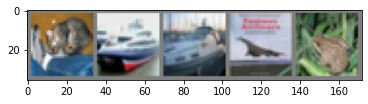

GroundTruth:  cat   ship  ship  plane


In [58]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

<font color='green'> Q6: Classify images using the model and make observation</font>

In [59]:
# --------------- One line of code here --------------
# Name the result as outputs
predicted = outputs.argmax(1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   ship  plane
